# **Text Classification**

In this notebook, we will train Naive Bayes, Logistic Regression and SVM classifier for text classification using *Scikit-learn* library. 

We will:

1. Load and preprocess the text data.
2. Convert the text into numerical features using a vectorizer.
3. Train and evaluate classifier models.
4. Analyze the results.

Class Labels:

1. Sadness = 0
2. Joy = 1
3. Love = 2
4. Anger = 3
5. Fear = 4
6. Surprise = 5
---

## **1. Import Required Libraries**


In [83]:
# Data handling and manipulation
import pandas as pd

# Text preprocessing and vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Model and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Model evalutation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Netural Language Toolkit
from nltk.corpus import stopwords

---

## **2. Load the Dataset**
We will load a sample dataset for text classification. For this example, we will use a dataset of SMS messages labeled as "spam" or "ham."


In [84]:
# Load the dataset
df = pd.read_csv('data/emotion.csv', index_col=0)

# Display the first few rows
df.head()


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


---

## **3. Explore the Dataset**
Understand the basic structure of the data, and check for any missing or imbalanced classes.


Missing values:
 text     0
label    0
dtype: int64


C:\Users\ahmet\AppData\Local\Temp\ipykernel_19252\1025018064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


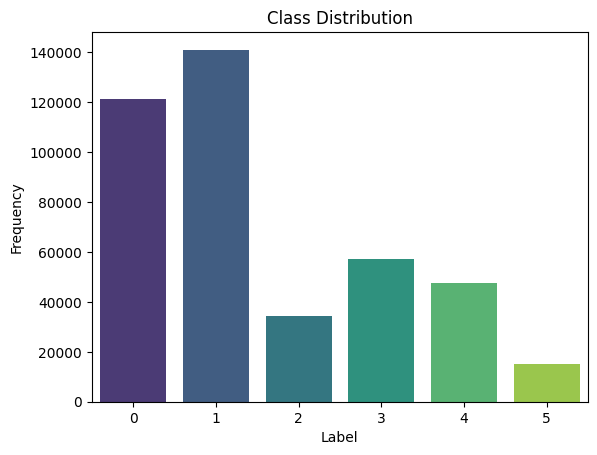

In [86]:
# Check for null values
print("Missing values:\n", df.isnull().sum())

# Class distribution
sns.countplot(data=df, x='label', palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()


---

## **4. Preprocess the Data**
Split the data into training and testing sets and convert the text messages into numerical features.


In [89]:
# Set sample label size for both train and test
TRAIN_LABEL_SAMPLE_COUNT = 10_000 ; TEST_LABEL_SAMPLE_COUNT = 3_000

# Select train dataset randomly
train_df = df.groupby("label").sample(TRAIN_LABEL_SAMPLE_COUNT, random_state=42)

# Select test dataset randomly
test_df = df.drop(index=train_df.index).groupby("label").sample(TEST_LABEL_SAMPLE_COUNT, random_state=42)

# Reset dataframe indexes
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)


In [90]:
# Function to process the text
stop_words =  stopwords.words('english')
def clean_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the clean_text function
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

---

## **5. Create Vectorizers**
We will train two vectorizers
1. CountVectorizer (Word counts)
2. TfidfVectorizer (TF-IDF scores)


In [92]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X_train_count_vec= vectorizer.fit_transform(train_df["text"])
X_test_count_vec = vectorizer.transform(test_df["text"])

print("Shape of training data:", X_train_count_vec.shape)
print("Shape of test data:", X_test_count_vec.shape)


Shape of training data: (60000, 29658)
Shape of test data: (18000, 29658)


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=5000)
X_train_tfidf_vec = tfidf_vectorizer.fit_transform(train_df["text"])
X_test_tfidf_vec = tfidf_vectorizer.transform(test_df["text"])

print("Shape of training data (TF-IDF):", X_train_tfidf_vec.shape)
print("Shape of test data (TF-IDF):", X_test_tfidf_vec.shape)


Shape of training data (TF-IDF): (60000, 5000)
Shape of test data (TF-IDF): (18000, 5000)


---

## **6. Train models**
We will use the `MultinomialNB`, `LogisticRegression` and `SVC` models 


In [111]:
# Initialize and train the model
model_count_vector = MultinomialNB()
model_count_vector.fit(X_train_count_vec, train_df["label"])


MultinomialNB()

In [117]:
# Initialize and train the model
model_TFIDF_vector = MultinomialNB()
model_TFIDF_vector.fit(X_train_tfidf_vec, train_df["label"])


MultinomialNB()

In [118]:
# Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_tfidf_vec, train_df["label"])

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
# Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf_vec, train_df["label"])

SVC(kernel='linear', random_state=42)

---

## **7. Evaluate the Models**
We will evaluate the performance of the models using:
- Accuracy score
- Classification report
- Confusion matrix


In [122]:
# Define evaluate function
def evaluate_model(model, y_target, y_pred):
    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_target, y_pred))
    print("\nClassification Report:\n", classification_report(y_target, y_pred))

    # Confusion matrix visualization
    cm = confusion_matrix(y_target, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy Score: 0.8696666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      3000
           1       0.87      0.78      0.83      3000
           2       0.85      0.91      0.88      3000
           3       0.89      0.89      0.89      3000
           4       0.85      0.84      0.84      3000
           5       0.86      0.92      0.89      3000

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



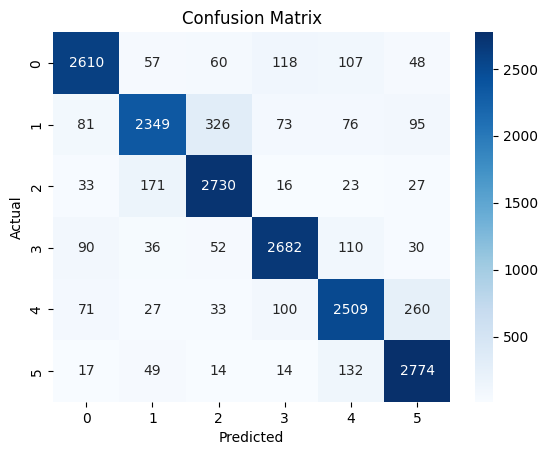

In [124]:
# Make predictions
y_pred_nb_cv = model_count_vector.predict(X_test_count_vec)
evaluate_model(model_count_vector, test_df["label"], y_pred_nb_cv)


Accuracy Score: 0.8742777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      3000
           1       0.88      0.80      0.84      3000
           2       0.85      0.91      0.88      3000
           3       0.90      0.90      0.90      3000
           4       0.86      0.84      0.85      3000
           5       0.86      0.92      0.88      3000

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



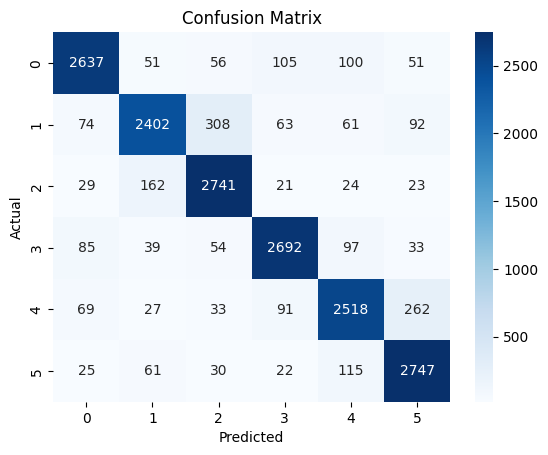

In [ ]:
# Make predictions
y_pred_nb_tfidf = model_TFIDF_vector.predict(X_test_tfidf_vec)

# Evaluate model
evaluate_model(model_TFIDF_vector, test_df["label"], y_pred_nb_tfidf)


Accuracy Score: 0.9075555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      3000
           1       0.92      0.85      0.89      3000
           2       0.89      0.95      0.92      3000
           3       0.91      0.93      0.92      3000
           4       0.90      0.85      0.88      3000
           5       0.89      0.96      0.92      3000

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



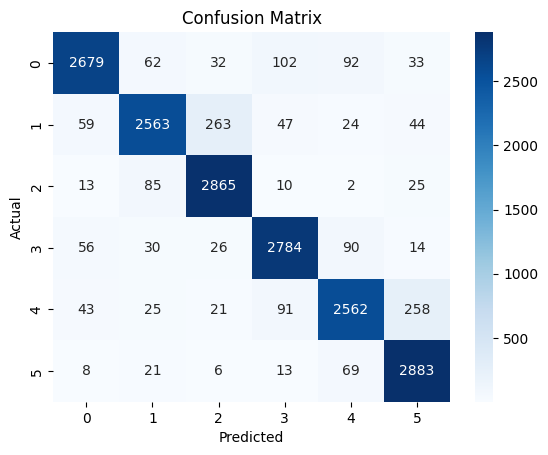

In [126]:
# Predictions for Logistic Regression
y_pred_lr = model_lr.predict(X_test_tfidf_vec)

# Evaluate model
evaluate_model(model_lr, test_df["label"], y_pred_lr)


Accuracy Score: 0.9086111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      3000
           1       0.94      0.84      0.88      3000
           2       0.88      0.97      0.92      3000
           3       0.92      0.92      0.92      3000
           4       0.90      0.86      0.88      3000
           5       0.88      0.99      0.93      3000

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



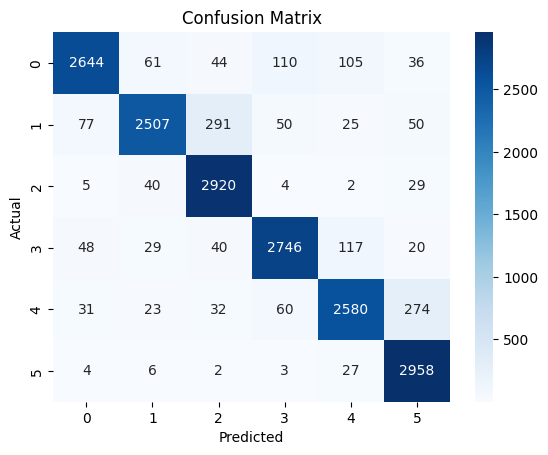

In [127]:
# Predictions for SVM
y_pred_svm = svm_model.predict(X_test_tfidf_vec)

# Evaluate model
evaluate_model(svm_model, test_df["label"], y_pred_svm)


Naive Bayes With Count Vectorizer: 0.87
Naive Bayes With TFIDF(Term Frequency-Inverse Document Frequency) : 0.87
Logistic Regression Accuracy: 0.91
SVM Accuracy: 0.91


C:\Users\ahmet\AppData\Local\Temp\ipykernel_19252\1576915314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


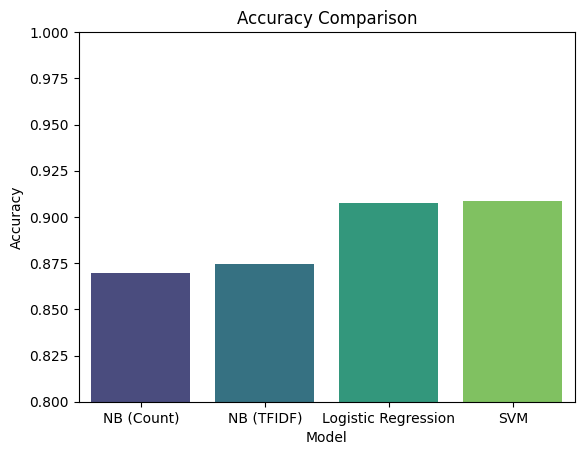

In [128]:
# Compare accuracy scores
accuracy_nb_cv = accuracy_score(test_df["label"], y_pred_nb_cv)
accuracy_nb_tfidf = accuracy_score(test_df["label"], y_pred_nb_tfidf)
accuracy_lr = accuracy_score(test_df["label"], y_pred_lr)
accuracy_svm = accuracy_score(test_df["label"], y_pred_svm)

print(f"Naive Bayes With Count Vectorizer: {accuracy_nb_cv:.2f}")
print(f"Naive Bayes With TFIDF(Term Frequency-Inverse Document Frequency) : {accuracy_nb_tfidf:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Visual comparison
models = ['NB (Count)', 'NB (TFIDF)','Logistic Regression', 'SVM']
accuracies = [accuracy_nb_cv, accuracy_nb_tfidf, accuracy_lr, accuracy_svm]

sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.show()


## **8. Conclusion and Insights**

### **Performance Summary**
The text classification models demonstrated the following levels of accuracy on the test set:

| Model                                  | Accuracy | Prediction Time for 18 000 sample |
|----------------------------------------|----------|-----------------------------------|
| Naive Bayes with CountVectorizer       | 87%      | 0.1s                              |
| Naive Bayes with TF-IDF                | 87%      | 0.1s                              |
| Logistic Regression                    | 91%      | 0.1s                              |
| Support Vector Machine (SVM)           | 91%      | 30.9s                             |

### **Key Observations**
- Both **Naive Bayes models** (using CountVectorizer and TF-IDF) yielded identical performance, indicating that the choice of feature extraction (word counts vs. TF-IDF scores) did not significantly impact Naive Bayes' predictive power on this dataset.
- **Logistic Regression and SVM** demonstrated superior performance compared to Naive Bayes, with an increase in accuracy of 4%. These models appear to better leverage the nuanced relationships captured by TF-IDF features.
- The use of **TF-IDF** as a feature extraction technique paired with advanced classifiers (Logistic Regression and SVM) proved effective in improving performance.
